# Kings County Housing Data

# Business Understanding 

For the purposes of our analysis, imagine that we are a group of data scientists working for a real estate development firm. Our objectives are to understand key features predicting sale price in order to motivate a data-driven decision making strategy for property redevelopment. 

In [1]:
# importing libraries 
import pandas as pd 
import seaborn as sns

In [2]:
# opening the dataset and reading info 
pd.set_option('display.max_columns', None)
housing_data = pd.read_csv('KC_Data/kc_house_data.csv')
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [3]:
# getting info on columns 
housing_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [4]:
# viewing first three records
housing_data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520


In [5]:
# dropping unnecessary columns column
housing_data.drop(columns = ['id', 'heat_source', 'sewer_system', ], inplace = True)

## NaN Values 

In [6]:
# dropping nan values 
housing_data.dropna(axis = 1, inplace = True)

In [7]:
# checking to see if NaN values were dropped
housing_data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

## Building Grade

In [ ]:
# Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:
'''
1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.
'''

In [13]:
# extracting only the integer value for grade column
housing_data['grade'] = housing_data['grade'].str.extract('(\d+)').astype(int)

In [14]:
# sorting values by grade category
housing_data['grade'].value_counts().sort_index(ascending = True)

1         2
2         2
3        13
4        51
5       393
6      2858
7     11697
8      9410
9      3806
10     1371
11      406
12      122
13       24
Name: grade, dtype: int64

<Axes: xlabel='grade'>

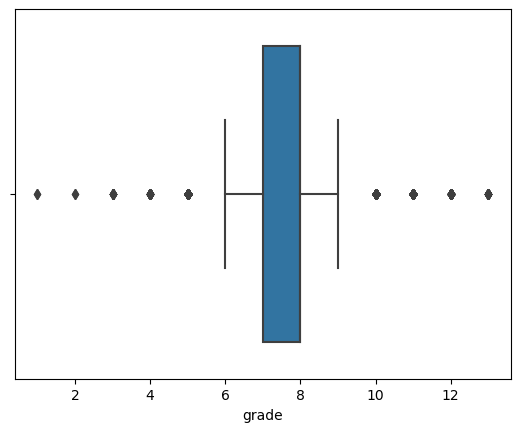

In [15]:
# viewing the range of values for building grade 
sns.boxplot(x = housing_data['grade'])

In [18]:
# filtering the data to a given range of building grade codes
housing_data[(housing_data['grade'] <= 9) & (housing_data['grade'] >= 6)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


### Rationale: 
- The majority of properties in the dataset are between building grade codes 6 & 9. Additionally, for the purposes of our analysis, a building grade 6 is the lowest code that meets building code and 9 being the upper threshold have better architectural design without additional customization. 

## Housing Features

<Axes: xlabel='bedrooms'>

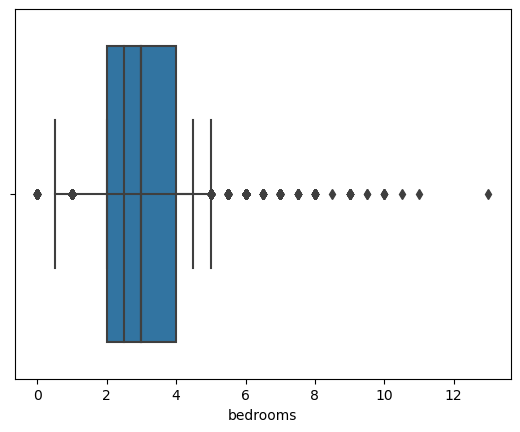

In [25]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
sns.boxplot(x = housing_data['bathrooms']), 
sns.boxplot(x = housing_data['bedrooms'])

## Geocoding

In [36]:
coords = housing_data['lat'].astype(str) + ',' + housing_data['long'].astype(str)
coords.to_csv('KC_Data/coords')

In [40]:
housing_data[housing_data.duplicated()].head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4846,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,NO,NONE,Average,9 Better,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
13981,4/27/2022,8004613.0,3,2.5,1630,825,3.0,NO,NO,YES,NONE,Average,8 Good,1200,430,0,380,2019,0,"South 35th Avenue, Bellevue, Nebraska 68123, U...",41.11170,-95.965985
13983,4/27/2022,8004613.0,3,2.5,1690,825,3.0,NO,NO,YES,NONE,Average,8 Good,1240,450,0,440,2019,0,"South 35th Avenue, Bellevue, Nebraska 68123, U...",41.11170,-95.965985


In [66]:
housing_data['address'].extract

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [ ]:
greenbelt_houses['date'].astype('datetime64').dt.strftime('%Y').astype('int64')

In [ ]:
housing_data['date'] = housing_data['date'].astype('datetime64').dt.strftime('%Y')

In [ ]:
sns.histplot(housing_data['date'])

In [ ]:
# notes 
# grade column 
# predictor(y) : price 
# features : neighborhood 
# more than 30k houses 
# 773 houses are by a greenbelt 
# avg price for a house in greenbelt is 1.5
# not many houses were renovated before being sold 
# majority of the houses were sold only in two years 2021, 2022
# majority of houses have grade between 6 and 9 